In [3]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
bikes = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/bikes_sharing.csv')

In [5]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [7]:
bikes['weekday'] = bikes['datetime'].dt.weekday

In [8]:
day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bikes['weekday'] = bikes['weekday'].map(day_map)
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed


In [9]:
bikes['hour'] = bikes['datetime'].dt.hour

In [10]:
def get_time_of_day(x):
  if x in range(6,10):
    return 'MorningCommute'
  elif x in range(10,15):
    return 'Midday'
  elif x in range(15,19):
    return 'EveningCommute'
  else:
    return 'Night'

In [11]:
bikes['time_of_day'] = bikes['hour'].apply(get_time_of_day)

In [12]:
# one hot encode
model_data = pd.get_dummies(bikes, columns=['season','weather','weekday','time_of_day','hour'], drop_first=True, dtype=int)

In [13]:
model_data.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'season_2', 'season_3',
       'season_4', 'weather_2', 'weather_3', 'weather_4', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'time_of_day_Midday', 'time_of_day_MorningCommute',
       'time_of_day_Night', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [14]:
import statsmodels.api as sm

In [15]:
Y = model_data['count']
X = model_data.drop(columns=['datetime','count', 'casual','registered'])
X = sm.add_constant(X)

In [16]:
model = OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     468.2
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:02:55   Log-Likelihood:                -66585.
No. Observations:               10886   AIC:                         1.333e+05
Df Residuals:                   10845   BIC:                         1.336e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [17]:
bikes[bikes['weekday']=='Thu']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day
115,2011-01-06 00:00:00,1,0,1,1,7.38,12.120,55,0.0000,0,11,11,Thu,0,Night
116,2011-01-06 01:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,4,4,Thu,1,Night
117,2011-01-06 02:00:00,1,0,1,1,6.56,11.365,64,0.0000,0,2,2,Thu,2,Night
118,2011-01-06 04:00:00,1,0,1,2,6.56,9.850,64,6.0032,0,1,1,Thu,4,Night
119,2011-01-06 05:00:00,1,0,1,2,5.74,9.090,69,6.0032,0,4,4,Thu,5,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10737,2012-12-13 19:00:00,4,0,1,1,12.30,15.150,45,11.0014,20,328,348,Thu,19,Night
10738,2012-12-13 20:00:00,4,0,1,1,12.30,16.665,45,0.0000,6,235,241,Thu,20,Night
10739,2012-12-13 21:00:00,4,0,1,1,11.48,15.910,48,0.0000,13,200,213,Thu,21,Night
10740,2012-12-13 22:00:00,4,0,1,1,10.66,14.395,60,6.0032,7,141,148,Thu,22,Night


In [18]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat,0,Night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat,1,Night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat,2,Night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat,3,Night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat,4,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed,19,Night
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed,20,Night
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed,21,Night
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed,22,Night


In [19]:
y_pred = model.predict(X)

In [20]:
y_pred

0        -22.971138
1        -43.300727
2        -53.553588
3        -53.795465
4        -53.694479
            ...    
10881    320.576137
10882    232.340334
10883    171.724761
10884    146.163698
10885     95.833899
Length: 10886, dtype: float64

In [21]:
bikes['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [22]:
import seaborn as sns

<Axes: ylabel='Count'>

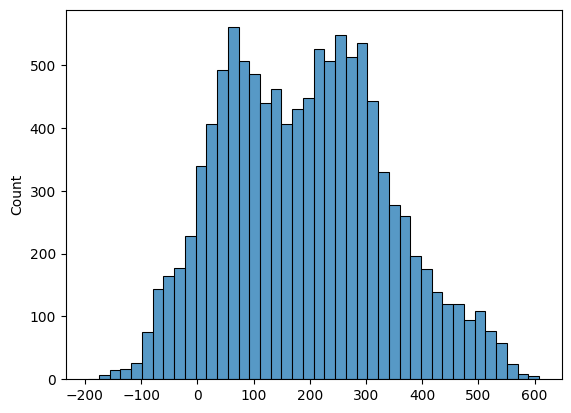

In [23]:
sns.histplot(y_pred)

<Axes: xlabel='count', ylabel='Count'>

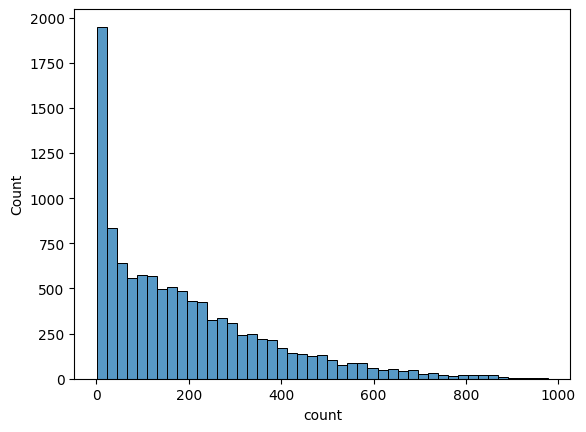

In [24]:
sns.histplot(bikes['count'])

In [25]:
res = y_pred - bikes['count']

<Axes: ylabel='Count'>

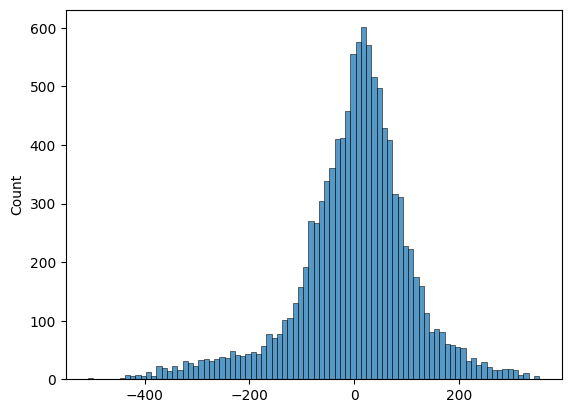

In [26]:
sns.histplot(res)

In [27]:
abs(res).mean()

79.1340796821189

In [28]:
bikes['count'].mean()

191.57413191254824

In [29]:
79/191

0.41361256544502617

In [30]:
final = pd.concat([bikes,res], axis=1)
## 加入到表里面，将残差和数据对应
final



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day,0
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat,0,Night,-38.971138
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat,1,Night,-83.300727
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat,2,Night,-85.553588
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat,3,Night,-66.795465
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat,4,Night,-54.694479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wed,19,Night,-15.423863
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wed,20,Night,-8.659666
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed,21,Night,3.724761
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed,22,Night,17.163698


<Axes: xlabel='count', ylabel='0'>

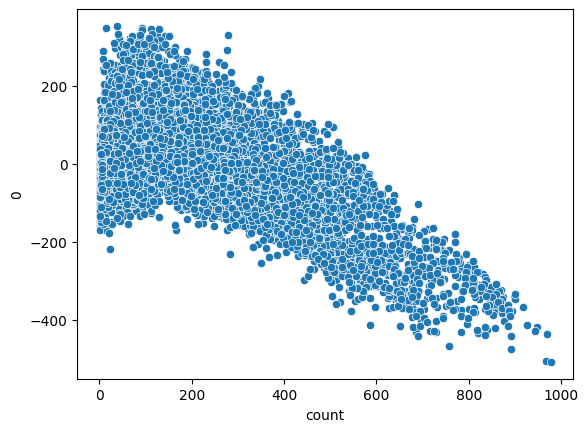

In [31]:
sns.scatterplot(x='count', y=0, data=final)
#count小的时候，残差很大，bias会出现

In [32]:
final[final['count']<200]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,hour,time_of_day,0
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Sat,0,Night,-38.971138
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Sat,1,Night,-83.300727
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Sat,2,Night,-85.553588
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Sat,3,Night,-66.795465
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Sat,4,Night,-54.694479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112,Wed,6,MorningCommute,-39.187342
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164,Wed,10,Midday,4.010728
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wed,21,Night,3.724761
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wed,22,Night,17.163698


<Axes: xlabel='weather', ylabel='0'>

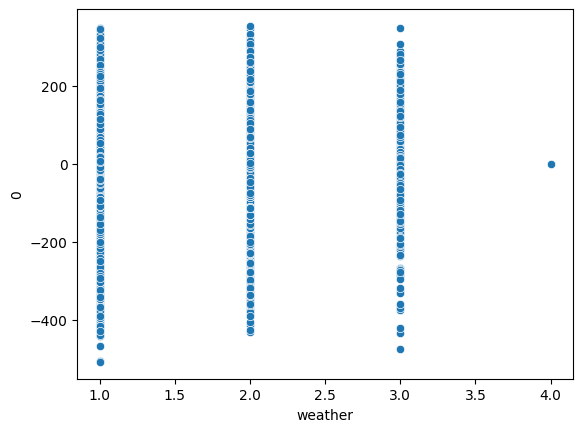

In [33]:
sns.scatterplot(x='weather', y=0, data=final)

<Axes: xlabel='hour', ylabel='0'>

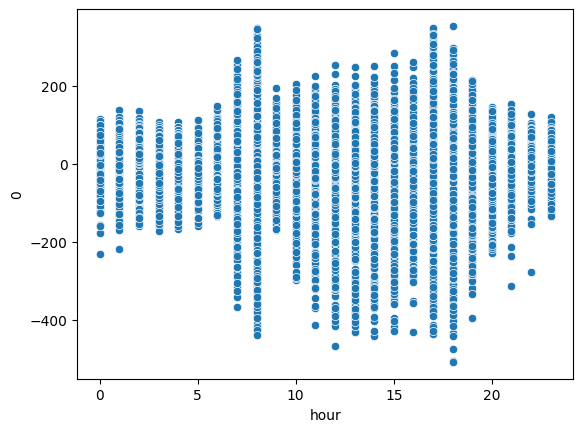

In [34]:
sns.scatterplot(x='hour', y=0, data=final)

In [35]:
#No feature engineering
bikes2 = bikes.drop(columns=['weekday','hour','time_of_day'])

In [36]:
model_data2 = pd.get_dummies(bikes2, columns=['season','weather'], drop_first=True, dtype=int)

In [37]:
Y = model_data2['count']
X = model_data2.drop(columns=['datetime','count', 'casual','registered'])
X = sm.add_constant(X)

In [38]:
model2 = OLS(Y,X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     346.7
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        20:02:59   Log-Likelihood:                -70282.
No. Observations:               10886   AIC:                         1.406e+05
Df Residuals:                   10873   BIC:                         1.407e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.0795      9.042     13.391      0.0

In [39]:
daily_data = bikes.set_index('datetime')

In [40]:
daily_data = daily_data.resample('D').aggregate({'season':'max', 'holiday':'max', 'workingday':'max', 'weather':'max', 'temp':'mean', 'atemp':'mean', 'humidity':'mean', 'windspeed':'mean', 'casual':'sum', 'registered':'sum', 'count':'sum'})

In [41]:
daily_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01,1.0,0.0,0.0,3.0,14.110833,18.181250,80.583333,10.749871,331,654,985
2011-01-02,1.0,0.0,0.0,3.0,14.902609,17.686957,69.608696,16.652122,131,670,801
2011-01-03,1.0,0.0,1.0,1.0,8.050909,9.470227,43.727273,16.636709,120,1229,1349
2011-01-04,1.0,0.0,1.0,2.0,8.200000,10.606087,59.043478,10.739809,108,1454,1562
2011-01-05,1.0,0.0,1.0,1.0,9.305217,11.463478,43.695652,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-15,4.0,0.0,0.0,2.0,13.290833,16.919167,65.041667,7.125450,767,4280,5047
2012-12-16,4.0,0.0,0.0,3.0,14.862500,18.496875,83.875000,6.749692,538,3248,3786
2012-12-17,4.0,0.0,1.0,3.0,16.126667,20.075000,90.708333,6.583308,212,4373,4585
